<a href="https://colab.research.google.com/github/rahmanole/MDTrAnal/blob/master/notebook/KCUSUM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn import metrics
import math
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

In [ ]:
sample_x_0 = np.random.normal(0,1,size=2000)
sample_x_1 = np.random.normal(0,1,size=2000)

sample_y_0 = np.random.normal(0,2,size=2000)
sample_y_1 = np.random.normal(0,2,size=2000)

sample_x = np.cumsum(sample_x_0)
sample_y = np.cumsum(sample_y_0)

In [ ]:
sample_x_0

array([ 0.52577767,  2.24196253,  1.06518638, ..., -0.89064688,
        1.3679255 ,  0.54333547])

In [ ]:
def gk(x,y):
  return np.exp(-((x-y)**2/2.0))


def mmd(x_n_1, x_n, y_n_1, y_n, gamma=0.5):

    xx = gk(x_n_1, x_n)
    yy = gk(y_n_1, y_n)
    xy = gk(x_n_1, y_n)
    yx = gk(x_n, y_n_1)
  
    return xx + yy - xy - yx

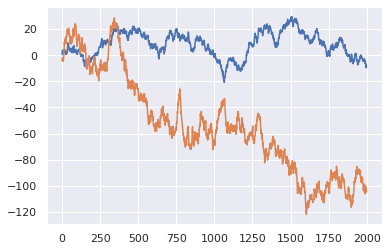

In [ ]:
plt.plot(np.arange(0,2000),sample_x)
plt.plot(np.arange(0,2000),sample_y)

In [ ]:
data = mmd(sample_x_0,sample_x_1,sample_y_0,sample_y_1)

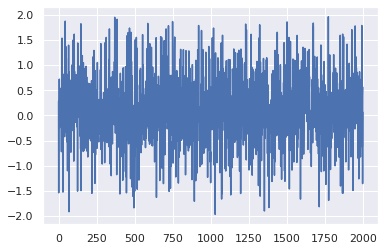

In [ ]:
plt.plot(np.arange(0,len(data)),data)

In [ ]:
data.mean()

0.09854739091546652

In [ ]:
def KCUSUM(sample_x_0,sample_x_1,sample_y_0,sample_y_1,h):
  Z_n = 0
  h >= 0
  delta = 0
  n = 400

  for i in range(2,n):

    #sample y

    if i%2 == 0:
      v_n = mmd(sample_x_0,sample_x_1,sample_y_0,sample_y_1).mean()
    else:
      v_n = 0
      
    Z_n += v_n

    if Z_n < 0:
      Z_n = 0

    if Z_n > h:
      T_kcusum = i
      break
  return T_kcusum

In [ ]:
KCUSUM(sample_x_0,sample_x_1,sample_y_0,sample_y_1,5)

102